# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

Requirement: 

matplotlib

pandas

numpy 

scikitplot

sklearn 


In [151]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scikitplot as skplt


## Dataset

In [152]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)
X[0]



array([ 1.56940371, -0.13338808])

### Graphing out the dataset for a quick overview

Text(0.5, 1.0, 'Scatter Plot of Two Moon-Shaped Classes')

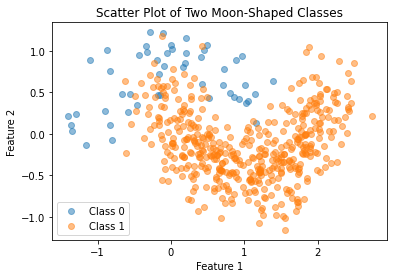

In [153]:
class_0 = X[Y == 0]  
class_1 = X[Y == 1]  

type(class_0)
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0', alpha=0.5)
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter Plot of Two Moon-Shaped Classes')

# X gives the coodinate of the data point while 1 gaves a boolean value of 0 and 1. 

## Training

Using Classifier: KNN

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix



# Creating training sets. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [155]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [156]:
Y_predict = classifier.predict(X_test)


## Testing / Optimization

[[ 13   6]
 [  2 129]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.96      0.98      0.97       131

    accuracy                           0.95       150
   macro avg       0.91      0.83      0.87       150
weighted avg       0.94      0.95      0.94       150



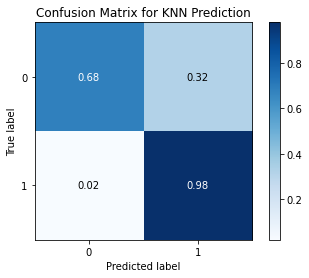

In [157]:
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict)) 
first_model_matrix = skplt.metrics.plot_confusion_matrix(Y_test, Y_predict, normalize=True, title = 'Confusion Matrix for KNN Prediction')



Looks like we are accurately predicting datas of class 1 but not so great at predicting datas of class 0.

This means that our decision boundry is biased toward class 1. 

One characterstic that could ascribe to such phenomenom is our class imbalance. We have 450 class 1 sample but only 50 class 0 sample. We are simply not receiving enough information on the minority class. 

To address the problem, we can either oversample the minority class or undersample the majority class. 

Some advantages of oversample is perserving valuable data but have drawbacks of potentiall overfitting. If 
we use the method of creating synthetic samples( )

Some advantages of undersample is we avoid potential overfitting, but we lose valuable information and we are making our already small
datasets even smaller.


### Oversampling Class 0 


In [158]:
# Re-illustrate that we created an imbalanced set of samples in our make moon function
class_0 = X[Y == 0]  
class_1 = X[Y == 1] 
print(len(class_0))
print(len(class_1))
print(type(X))


50
450
<class 'numpy.ndarray'>


First, we will need to stack the X and Y arrays together so we can plug it into sklearn's resample function.
We will unstack them back to two ndarrays afterward

Let us first create 50 more samples of class_0, so a total of n_samples 100.

In [159]:
from sklearn.utils import resample

# Combine into one array
data = np.column_stack((X, Y))

# Split into two sets
class_0 = data[data[:, -1]==0]
class_1 = data[data[:, -1]==1]

class_0 = resample(class_0, replace=True, n_samples= 100, random_state=42)

# Combine back together.
data = np.vstack((class_0, class_1))

# Note that in the combined data, first two column are 
# X's coordinates and last column is the Y value
oversampled_X = data[:, :-1] # Extract all columns except last one 
oversampled_Y = data[:, -1] #Extract last column 


*Note
If replace=True, the function randomly selects samples from the input data, allowing duplicates. This mimics the process of bootstrapping, where you sample with replacement from your original dataset.

If replace=False, the function randomly shuffles the input data and returns the first n_samples samples. This process is similar to simple random sampling without replacement.

Now let us check the new class_0 sample counts

In [160]:
class_0 = oversampled_X[oversampled_Y == 0]  
len(class_0)

100

Redo our training 

Note that we are only training with the oversampled data.
We are still testing using our original data, just with a model trained with more class_0 samples

Our original data are X, Y

So essentially our new_X_test and new_Y_test here are useless

In [161]:
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(oversampled_X,oversampled_Y, test_size=0.3, random_state=1)


scaler = StandardScaler()
scaler.fit(new_X_train)
new_X_train = scaler.transform(new_X_train)
new_X_test = scaler.transform(new_X_test) 

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(new_X_train, new_Y_train)


KNeighborsClassifier()

Check our result.

Note we are comparing back to X_train, not new_X_train. Same for Y

[[ 16   3]
 [  5 126]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.96      0.98      0.97       131

    accuracy                           0.95       150
   macro avg       0.91      0.83      0.87       150
weighted avg       0.94      0.95      0.94       150



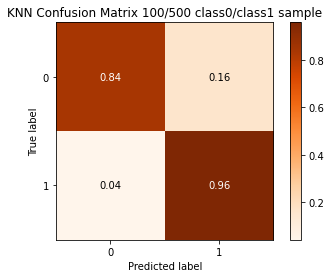

In [162]:
Y_predict2 = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_predict2))
print(classification_report(Y_test, Y_predict)) 
second_model_matrix = skplt.metrics.plot_confusion_matrix(Y_test, Y_predict2, normalize=True, title = 'KNN Confusion Matrix 100/500 class0/class1 sample', cmap = 'Oranges')


# We are getting a much better result.
Now, let us try one more with 150 total class_0 sample after generation

You can ignore the code below, they should have been put into a function to reduce repetition. The only thing changed is n_sample =350 and we ran the same process for n_sample = 150


In [163]:
# Combine into one array
data = np.column_stack((X, Y))

# Split into two sets
class_0 = data[data[:, -1]==0]
class_1 = data[data[:, -1]==1]

class_0 = resample(class_0, replace=True, n_samples= 150, random_state=42)

# Combine back together.
data = np.vstack((class_0, class_1))

# Note that in the combined data, first two column are 
# X's coordinates and last column is the Y value
oversampled_X = data[:, :-1] # Extract all columns except last one 
oversampled_Y = data[:, -1] #Extract last column 

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(oversampled_X,oversampled_Y, test_size=0.3, random_state=1)

scaler = StandardScaler()
scaler.fit(new_X_train)

new_X_train = scaler.transform(new_X_train)
scaler.fit(new_X_train)

new_X_train = scaler.transform(new_X_train)
new_X_test = scaler.transform(new_X_test) 

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(new_X_train, new_Y_train)



KNeighborsClassifier()

[[ 18   1]
 [  9 122]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.96      0.98      0.97       131

    accuracy                           0.95       150
   macro avg       0.91      0.83      0.87       150
weighted avg       0.94      0.95      0.94       150



<AxesSubplot: title={'center': 'KNN Confusion Matrix 150/500 class0/class1 sample'}, xlabel='Predicted label', ylabel='True label'>

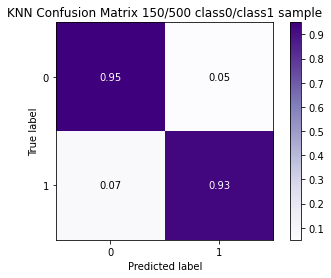

In [164]:
Y_predict3 = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_predict3))
print(classification_report(Y_test, Y_predict)) 
skplt.metrics.plot_confusion_matrix(Y_test, Y_predict3, normalize=True, title = 'KNN Confusion Matrix 150/500 class0/class1 sample', cmap = 'Purples')

Side by side comparison 

<AxesSubplot: title={'center': 'KNN Confusion Matrix 150/450 [0/1]'}, xlabel='Predicted label', ylabel='True label'>

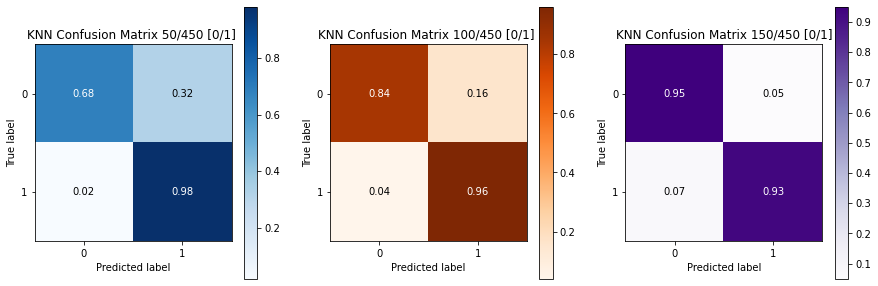

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

skplt.metrics.plot_confusion_matrix(Y_test, Y_predict, normalize=True, title = 'KNN Confusion Matrix 50/450 [0/1] ', ax=axes[0])

skplt.metrics.plot_confusion_matrix(Y_test, Y_predict2, normalize=True, title = 'KNN Confusion Matrix 100/450 [0/1] ', cmap = 'Oranges', ax=axes[1])

skplt.metrics.plot_confusion_matrix(Y_test, Y_predict3, normalize=True, title = 'KNN Confusion Matrix 150/450 [0/1]', cmap = 'Purples', ax=axes[2])


## Performance Analysis

We can see that we are achieving better results when it comes to correctly predicting 0 class by synthetically increasing class 0 samples to reduce the existing imbalance between the majority and minority classes. Such improvement was accpanied by a compensation of decreased class 1 prediction accuracy, although that decrease seems to level off/linger when the samples was increased to a certain extent. (250 -> 350) actually saw an increase in class 1 prediction accuracy, although in very small margin. 

The result is expected, as we shift our classification boundry away from biasing class 1, we naturally will get a decrease in accuracy for predicting class 1. We could offset such compensation by implementing a different model with a more suitable classification algorithm, increase our originally generated sample size (In real world this could be collecting more data of both sides), or further find an optimization strategy in reducing class imbalance. Such as trying to undersample majority class or do a combination of both over and undersample. The true best method will require more testing and experimentation with more datasets and optimization methods.